In [4]:
import numpy as np
import math
import itertools
import matplotlib.pyplot as plt
import scipy.linalg
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [40]:
#1. Решите линейную систему:
A=np.array([[1,2,3],[4,0,6],[7,8,9]])
B=np.array([12,2,1])
np.linalg.det(A)

59.999999999999986

In [41]:
np.linalg.solve(A,B)

array([-9.2       ,  0.9       ,  6.46666667])

In [38]:
#2. Найдите псевдорешение:
A=np.array([[1,2,-1],[3,-4,0],[8,-5,2],[2,0,-5],[11,4,-7]])
B=np.array([1,7,12,7,15])
np.linalg.lstsq(A,B)

(array([ 1.13919353, -0.90498444, -0.9009803 ]),
 array([0.71523211]),
 3,
 array([15.2817306 ,  9.59852942,  3.65197794]))

In [30]:
#3. Сколько решений имеет линейная система:
#Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее. 
A=np.array([[1,2,3],[4,5,6],[7,8,9]])
B=np.array([12,2,1])
np.linalg.solve(A,B)

array([-4.05323966e+16,  8.10647933e+16, -4.05323966e+16])

In [31]:
np.linalg.lstsq(A,B)

(array([-7.69444444, -0.61111111,  6.47222222]),
 array([], dtype=float64),
 2,
 array([1.68481034e+01, 1.06836951e+00, 1.47280825e-16]))

In [36]:
B=np.array([0,0,0])
np.linalg.solve(A,B)

array([0., 0., 0.])

In [5]:
#4. Вычислите LU-разложение матрицы:
A=np.array([[1,2,3],[2,16,21],[4,28,73]])
P,L,U=scipy.linalg.lu(A)
print(P)
print(L)
print(U)
print(np.dot(P,A)-np.dot(L,U))

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]
[[ -2. -12. -52.]
 [  3.  26.  70.]
 [ -1. -14. -18.]]


In [8]:
#После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений с данной матрицей.
B=np.array([1,2,4])
np.linalg.solve(A,B)

array([ 1., -0., -0.])

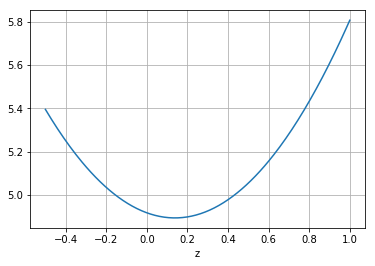

In [13]:
#5. Найдите нормальное псевдорешение недоопределенной системы:
#Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум. 
#Чтобы найти нормальное псевдорешение - нужно минимизировать норму вектора.
def Q(x,y,z):
    return ((2+1/7+z/21)**2+(-12/21+10*z/21)**2+z**2)

x=np.linspace(-0.5,1,201)
plt.plot(x,Q(0,0,x))
plt.xlabel('z')
plt.grid(True)
plt.show()

In [24]:
#Минимум нормы вектора
z=Q(0,0,0.14)
z

4.894837188208617

In [25]:
#Нормальное псевдорешение
x=(2+1/7+z/21, -12/21+10*z/21, z)
x

(2.375944628009934, 1.7594462800993413, 4.894837188208617)

In [26]:
#6. Найдите одно из псевдорешений вырожденной системы:
A=np.array([[1,2,3],[4,5,6],[7,8,9]])
B=np.array([2,5,11])
Q,R=np.linalg.qr(A)
print(A)
print(Q)
print(R)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]
[[-8.12403840e+00 -9.60113630e+00 -1.10782342e+01]
 [ 0.00000000e+00  9.04534034e-01  1.80906807e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.77635684e-15]]


In [27]:
print(np.dot(Q,R))
print(np.dot(np.transpose(Q),Q))

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
[[ 1.00000000e+00 -5.55111512e-16 -2.77555756e-16]
 [-5.55111512e-16  1.00000000e+00  5.68989300e-16]
 [-2.77555756e-16  5.68989300e-16  1.00000000e+00]]


In [29]:
#Попробуйте также отыскать и нормальное псевдорешение.
R1=R[:2,:2]
B1=np.dot(np.transpose(Q),B)[:2]
X1=np.linalg.solve(R1,B1)
X=np.append(X1,0)
np.linalg.norm(X)
np.linalg.norm(np.dot(A,X)-B)

1.2247448713915894